# Boundary Integral Method Final Project: Nonlifting Flow Problem

## Department of Engineering Science and Ocean Engineering
## National Taiwan University
### R09525090 Daniel Lam

This project purpose is to solve the potential flow around arbitrary airfoils using the boundary integral equation formulation, with a Kutta condition applied at the trailing edge of the airfoil. We first start the project by solving first with panel methods, based on source and doublet elements. In addition, problems based on Neumann and Dirichlet boundary conditions will be solved in this project. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import interpolate
from math import log, cos, sin, atan2
pi = np.pi
np.set_printoptions(precision=3)

# Helper Functions

Some functions that will be used during the project, but their purpose is more for either obtaining data or the visualization of the results:

1. readAirfoilData
2. processDat
3. plotAirfoil

In [2]:
%run helperFunctions.ipynb

# Geometry

The discretization of the geometry is the first step of the problem. For this we employ Python's numerical library Scipy to describe the airfoil geometry through splines. In general, the geometry of the airfoil will be described by a parameterized curve, with parameter $t = [0, 1]$, where $t = 0$ is the parameter value when the point is on the upper trailing edge, and $t = 1$ for the lower trailing edge. 

This library also allows us to obtain the derivatives of the curve, in order to obtain either the vector tangent or normal to the curve. Since a curve can have "two" normals on a point, i.e., one points outward of the curve, the other one points inward, we must correct this behavior by using the cross product of the tangent vector and the normal curve, such that only the cross product of the tangent vector and the normal vector $ t \times n $ is either always negative or positive.

The only requirement for the points of the 2D airfoil is that the points start from the upper trailing edge, and then go to the lower trailing edge, otherwise, the behaviour of the program is not guaranteed to be correct.






In [3]:
%run geometry.ipynb

## Geometry Code Validation

To check that the code is working correctly, we employ various examples to check the correctness of the code and see there's not any issue with the expected behaviour of the program.

/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat


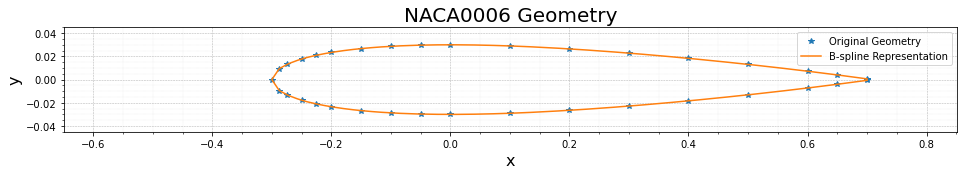

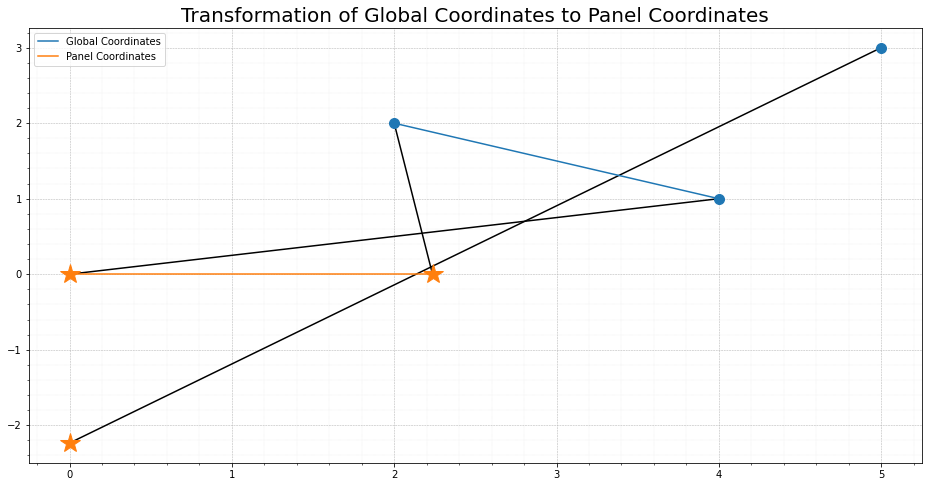

In [4]:
%run geometryCodeValidation.ipynb

# Numerical Code For the Nonlifting Problem

A list of the methods that will be utilized on this problem are:
1. Constant-Strength Source Element Method
2. Linear-Strength Source Element Method
3. Boundary Integral Method using Trapezoidal Quadrature
4. Boundary Integral Method using Trapezoidal Quadrature + Regularization
5. Boundary Integral Method using Midpoint Quadrature
6. Boundary Integral Method using Midpoint Quadrature + Regularization

## 1. Constant-Strength Source Element Method

## 2. Linear-Strength Source Element Method

## 3. Boundary Integral Method using Trapezoidal Quadrature

In [31]:
%run trapezoidalQuad.ipynb

/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


[[ 9.646e-01  6.437e-03  2.291e-03 ...  2.291e-03  6.437e-03  0.000e+00]
 [ 7.951e-02 -2.182e-01  8.068e-04 ...  2.509e-02  1.005e+00  7.951e-02]
 [ 3.975e-02  1.133e-03  1.021e-01 ...  7.158e-01  3.524e-02  3.975e-02]
 ...
 [ 3.975e-02  3.524e-02  7.158e-01 ...  1.021e-01  1.133e-03  3.975e-02]
 [ 7.951e-02  1.005e+00  2.509e-02 ...  8.068e-04 -2.182e-01  7.951e-02]
 [ 1.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00 -1.000e+00]]
The norm of the error is  0.03648038901509331


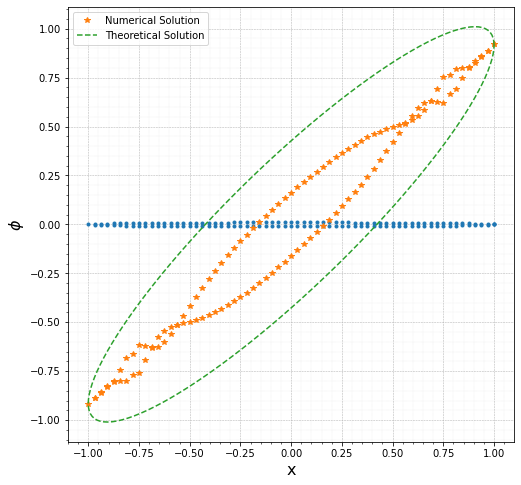

In [36]:
N = 128
U0 = 1 
thic = .01
AOA = 25
## create geometry
t = np.linspace( 0, 1, 512*2 )
dt = t[1] - t[0] 

a = 1
b = thic
c = (a**2-b**2)**.5

X = .5*(a+b) * np.cos( 2 * pi * t )
Y = .5*(a+b) * np.sin( 2 * pi * t )

Z = X + 1j * Y ## circular
z = Z + c**2/(4*Z) ## elliptical
X = np.real(z)
Y = np.imag(z)

## create system of equations
x, y, theta, A, b, ds_dt = trapezoidalQuad( X, Y, N, U0, AOA )


## solve system of equations
phi = np.linalg.solve( A, b )
print( A )


## theoretical solution
t = np.linspace( 0, 1, N+1 )

a = 1
b = thic
c = (a**2-b**2)**.5

X = .5*(a+b) * np.cos( 2 * pi * t )
Y = .5*(a+b) * np.sin( 2 * pi * t )

Z = X + 1j * Y ## circular
z = Z + c**2/(4*Z) ## elliptical
X = np.real(z)
Y = np.imag(z)

## theoretical solution
eta = np.arctan2(np.imag(Z), np.real(Z))
w = (a+b)*U0*np.cos(eta - AOA*pi/180)

## plot solution
fig, ax = plt.subplots(figsize=(8, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel('x', fontsize=16)
plt.ylabel('$\phi$', fontsize=16)
ax.plot( np.concatenate( (x,[x[0]]) ), np.concatenate( (y,[y[0]]) ), '.' )

ax.plot( x, phi, '*',label="Numerical Solution" )
ax.plot( np.real(z), np.real(w), '--', label="Theoretical Solution" )

print( "The norm of the error is ", np.linalg.norm( phi-np.real(w))/N )

# ## compute pressure coefficient
# dphi_ds = np.diff( phi ) / np.diff( np.linspace(0, 1, N + 1)) / ds_dt[1:]
# cp = 1 - (dphi_ds/U0)**2
# ax.plot( (x[:-1]), cp, '.', label="Pressure Coefficient" ) 
ax.legend()
plt.savefig("/Users/daniellam/Desktop/nonreg.jpg")





## 4. Boundary Integral Method using Trapezoidal Quadrature + Regularization

In [33]:
%run trapezoidalQuadRegularized.ipynb

/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


[[ 0.841  0.004  0.003 ...  0.003  0.133  0.   ]
 [ 0.002  0.504  0.002 ...  0.117  0.229  0.119]
 [ 0.002  0.004  0.497 ...  0.216  0.121  0.011]
 ...
 [ 0.011  0.121  0.216 ...  0.497  0.004  0.002]
 [ 0.119  0.229  0.117 ...  0.002  0.504  0.002]
 [ 1.     0.     0.    ...  0.     0.    -1.   ]]
The norm of the error is  0.013214563177462712


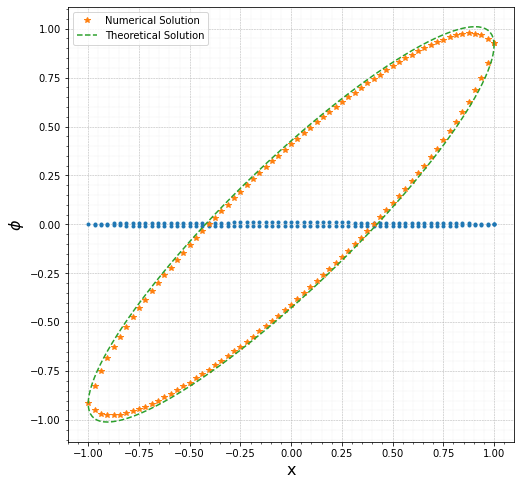

In [38]:
N = 128
U0 = 1 
thic = .01
AOA = 25
## create geometry
t = np.linspace( 0, 1, 512*2 )
dt = t[1] - t[0] 

a = 1
b = thic
c = (a**2-b**2)**.5

X = .5*(a+b) * np.cos( 2 * pi * t )
Y = .5*(a+b) * np.sin( 2 * pi * t )

Z = X + 1j * Y ## circular
z = Z + c**2/(4*Z) ## elliptical
X = np.real(z)
Y = np.imag(z)

## create system of equations
x, y, theta, A, b, ds_dt = trapezoidalQuadRegularized( X, Y, N, U0, AOA )


## solve system of equations
phi = np.linalg.solve( A, b )
print( A )


## theoretical solution
t = np.linspace( 0, 1, N+1 )

a = 1
b = thic
c = (a**2-b**2)**.5

X = .5*(a+b) * np.cos( 2 * pi * t )
Y = .5*(a+b) * np.sin( 2 * pi * t )

Z = X + 1j * Y ## circular
z = Z + c**2/(4*Z) ## elliptical
X = np.real(z)
Y = np.imag(z)

## theoretical solution
eta = np.arctan2(np.imag(Z), np.real(Z))
w = (a+b)*U0*np.cos(eta - AOA*pi/180)

## plot solution
fig, ax = plt.subplots(figsize=(8, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel('x', fontsize=16)
plt.ylabel('$\phi$', fontsize=16)
ax.plot( np.concatenate( (x,[x[0]]) ), np.concatenate( (y,[y[0]]) ), '.' )

ax.plot( x, phi, '*',label="Numerical Solution" )
ax.plot( np.real(z), np.real(w), '--', label="Theoretical Solution" )

print( "The norm of the error is ", np.linalg.norm( phi-np.real(w))/N )

# ## compute pressure coefficient
# dphi_ds = np.diff( phi ) / np.diff( np.linspace(0, 1, N + 1)) / ds_dt[1:]
# cp = 1 - (dphi_ds/U0)**2
# ax.plot( (x[:-1]), cp, '.', label="Pressure Coefficient" ) 
ax.legend()
plt.savefig("/Users/daniellam/Desktop/nonreg.jpg")





